# Discovering Tourist Hotspots

## Introduction
Tourism is on of the main sources of generating inome in a healthy economy by using data driven approach we aim to get understand underlying patterns and trends that can be used by stakeholders when making decisions.

The dataset being used in this study is a public dataset that can be accesed from kaggle [dataset](https://www.kaggle.com/datasets/erennik/mountains-and-beaches-dataset).This dataset aims to analyze the public preference between two popular vacation types:
 * Beaches
 * Mountain 

It provides insights into various demographic and lifestyle factors that may influence these preferences.

![Mountain and Beaches](M.png)

## Business Understanding


### Overview
This analysis has the main goal to discover the insights about the behaviors and preferences for visitors across different tourist sites. We intent to understand key factors related to demographic, financial and behavioral data that influence site selection and travel habits. Stakeholders will use this information to make more data driven decisions about visitor experiences, marketing strategy and priority site development.

### Business Problem


**We aim to**:

 1. Find out who the visitor demographics (age, gender, income, and education level) are.
 2. Find out travel patterns, like how often, what to do, and how much one can afford on vacations.
 3. Evaluate geographic and environmental preferences and how they range from nearness to mountains or beaches,
    favorite seasons, and even environmental issues in order to help understand these preferences.
 4. We conduct both exploratory and confirmatory analyses so that we’re making sure the insights are consistent with trends overall.
 5. Compare logistic regression and neural network models for classifying visitor preferences and predicting site selections.

**Outcome**

The findings will give the company’s management actionable information to work on refining their marketing strategies, deciding priority development of the destination, and pulling in more audience. They will provide the guidance to direct strategic decisions to boost customer satisfaction and, by extension, overall company viability and positioning.


## Data Understanding

In [30]:
# Import necessary modules for data cleaning
import pandas as pd 
import numpy as np 


### 1). Load the Vacation data


In [79]:
# Import the data 
Vacation=pd.read_excel('Group Activity Dataset.xlsx')
Vacation.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,Mountains
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,Beach
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,Mountains
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,Mountains
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,Beach


In [32]:
Vacation.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

### 2). Get data Info ✍🏿🧐

In [33]:
# Get a snapshot of the data types
Vacation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     39999 non-null  int64 
 1   Gender                  39999 non-null  object
 2   Income                  39999 non-null  int64 
 3   Education_Level         39999 non-null  object
 4   Travel_Frequency        39999 non-null  int64 
 5   Preferred_Activities    39999 non-null  object
 6   Vacation_Budget         39999 non-null  int64 
 7   Location                39999 non-null  object
 8   Proximity_to_Mountains  39999 non-null  int64 
 9   Proximity_to_Beaches    39999 non-null  int64 
 10  Favorite_Season         39999 non-null  object
 11  Pets                    39999 non-null  int64 
 12  Environmental_Concerns  39999 non-null  int64 
 13  Preference              39999 non-null  object
dtypes: int64(8), object(6)
memory usage: 4.3+ MB


* There is no missing data in our dataset.
* The vacation dataset has 14 columns and 39999 observations.
* The dtypes for the data frame is a mixture of both intergers and objects. 

### 3). Perform Descriptive statistics

In [34]:
# Investigate the numeric variables
Vacation.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns
count,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000
mean,43.491387,69968.544589,4.491562,2747.883972,149.864372,149.902823,0.503188,0.498187
std,14.976962,28820.596801,2.873941,1295.260996,86.511392,86.512805,0.499996,0.500003
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45047.500000,2.000000,1630.500000,75.000000,75.000000,0.000000,0.000000
50%,43.000000,70087.000000,4.000000,2744.000000,150.000000,150.000000,1.000000,0.000000
75%,56.000000,94940.500000,7.000000,3872.000000,225.000000,225.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000


In [35]:
# Investigate the categorical variables
Vacation.describe(include='object')

,Gender,Education_Level,Preferred_Activities,Location,Favorite_Season,Preference
count,39999,39999,39999,39999,39999,39999
unique,3,4,4,3,4,2
top,female,doctorate,sunbathing,urban,summer,Beach
freq,13443,10098,10041,13393,10174,30024


## Data cleaning 
From the data understanding section we saw that our data did not have missing data.But we can do a further cleaning by: 
 * *Outliers*:Investigating the outliers in numeric variables to understand if they should be kept or removed from the data.
 * *One-Hot-Encoding*:For the categorical variables that will be included in the model we will have to convert them to numerics since the models do not work well with object variables

 ![clean](Cl.png)

In [36]:
# Import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

### a) Cheking Outliers

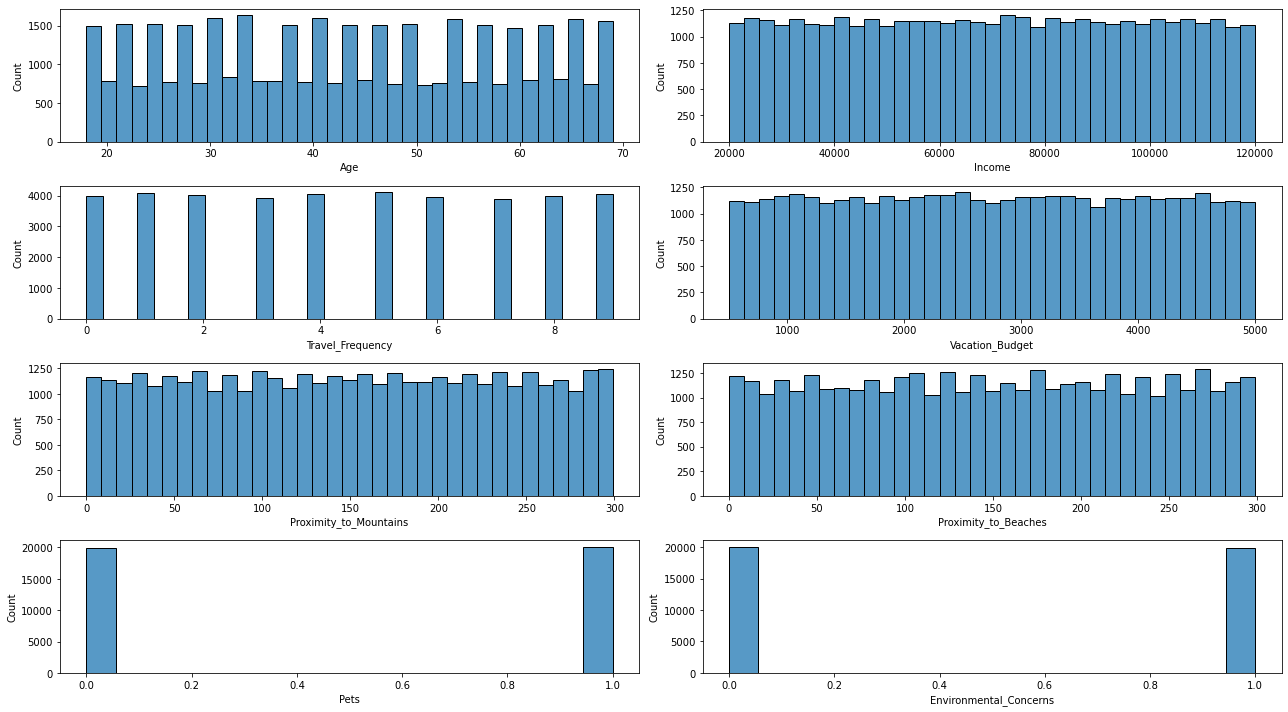

In [37]:
# Filter numeric columns
vac_num =Vacation.select_dtypes(include='number')

# We will use histograms to visualize the numeric variables
fig,axes = plt.subplots(nrows=4,ncols=2,figsize =(18,10))
axes = axes.ravel()  # Flatten to 1D for easier indexing

# Iterate through each numeric column in vac_num
for n, col_name in enumerate(vac_num.columns):
    if n >= len(axes):  # Stop if there are more variables than subplots
        break
    ax = axes[n]
    sns.histplot(vac_num[col_name], ax=ax)
    plt.tight_layout();




From the subplots we can gather more information about our numeric variables.
* Most of the variables look like they follow a uniform distributions.
* For the `pets`,`Environmental_Concerns` and `Travel` frequency we will choose to treat them as nominal variables due to their nature as discrete variables. To make the plots more interpretable.
* Something odd about the `Age` variable 🌨️It does not look to follow a normally distribution.
* Based on the `hist plot` we can conclude there is absence of outliers in our data


In [38]:
# Create a function that uses IQR to identify outliers 
# Input(data frame)
# Step1 : compute the upper and lower quartile 
# Step2 : Compute the IQR(Q3-Q1)
# Step3 : Use conditional statement to filter (Q3+IQR*1.5),(Q1-IQR*1.5)
# Return a data frame with columns and rows containing outliers 

def outliers(data):
    """ 
    Input(data): Takes in a data frame 

    Make sure the dataset contains only `numeric` variable otherwise 
    it will be removed.

    The method being applied in this function uses IQR formular
    to detect outliers    

    Output(data frame): Returns a dataframe containing the no
                        outliers in each column
    Example:

      ```
      x = pd.DataFrame(...)
      x = x.select_dtypes(includes ='number')
      outliers(x)
      ```
    """
    if str(type(data)) == "<class 'pandas.core.frame.DataFrame'>":
        data = data.select_dtypes(include ='number')
    else:
        return 'DataError:🧐Oops! data is not a dataframe check type(data)'
    to_list = list()
    final_df = pd.DataFrame(columns=data.columns,index=['Number of outliers:'])
    for n,col in enumerate(data):
        Q1=np.quantile(a=data[col],q=0.25)
        Q3=np.quantile(a=data[col],q=0.75)
        IQR =Q3-Q1
        for obs in data[col]:
            if (obs <=(Q3+IQR*1.5)) & (obs >=(Q1-IQR*1.5)):
                to_list.append(obs)
            else:
                obs= np.nan
                to_list.append(obs) 
        to_df =pd.Series(to_list,name=col)
        val = to_df.isna().sum()
        final_df[col] = val

            
    return final_df

# Use this function 
outliers(vac_num['Age'])


'DataError:🧐Oops! data is not a dataframe check type(data)'

Using Interquartile Range we can observe that our dataset does not contain outliers 

### b). One Hot Encoding
During the proccess of Data Cleaning we observed that the dataset has categorical columns: `Gender` , `Education_Level`, `Preferred_Activities`, `Location`, `Favorite_Season` and `Preference`. But More on this in the modelling section...🤖🚀

## Exploratory Data Analysis

For this section we will use various statistical techniques
to try and unveil the patterns in the data.
By exploring various the statistical techniques:
 * AB testing
 * ANOVA test
 * Correlation Analysis
and lots of Visuals 📈📊 to help in understanding the variables to be used for modelling.Like any explorer motto ...


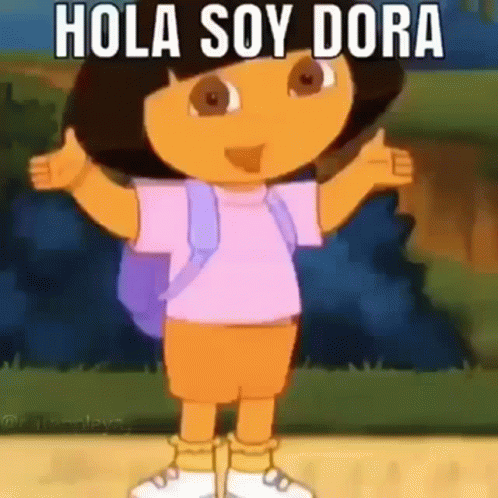

### 1). Univariate Analysis

#### Numeric variables

In [39]:
type(vac_num)

pandas.core.frame.DataFrame

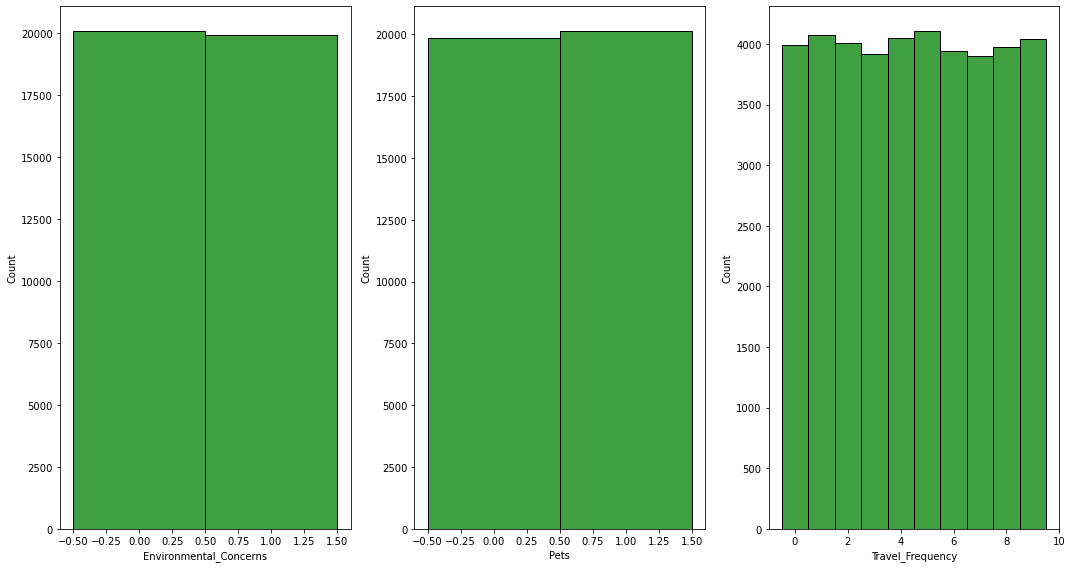

In [40]:
# PLot the discrete variables
dis_vac = vac_num.loc[:,['Environmental_Concerns','Pets','Travel_Frequency']]

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))

for n,col_name in enumerate(dis_vac):
    if n >=len(axes):
        break
    ax =axes[n]
    sns.histplot(dis_vac[col_name],ax=ax,discrete=True,color='green')
    plt.tight_layout()

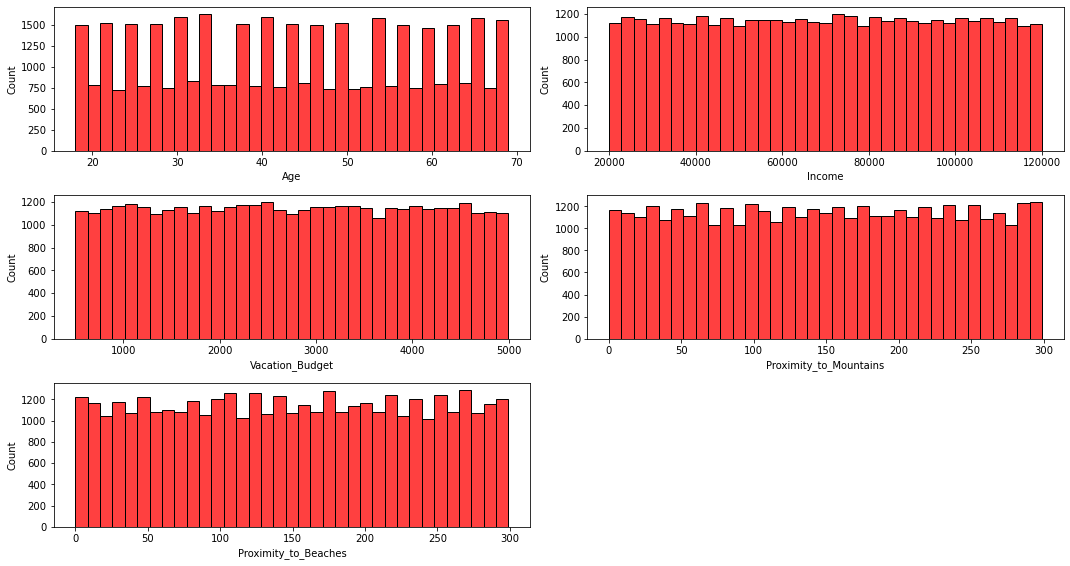

In [41]:
# Plot the continous variables
cont_vac=vac_num.drop(columns=dis_vac.columns)

fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,8))
axes = axes.ravel()  # Flatten the 2D array into a 1D array for easier indexing

for n,col_name in enumerate(cont_vac):
    ax =axes[n]
    sns.histplot(cont_vac[col_name],ax=ax,color='red')
# Remove any unused subplots
for i in range(len(cont_vac.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
# cont_vac

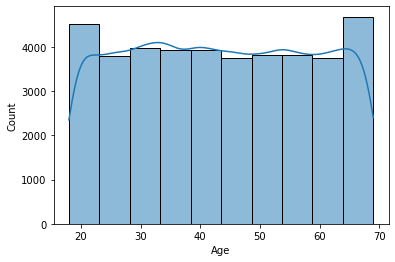

In [42]:
sns.histplot(x=vac_num['Age'],kde=True,bins=10);

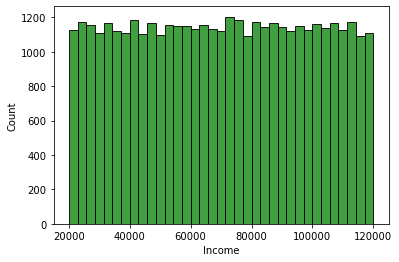

In [43]:
sns.histplot(vac_num['Income'],color='green');

#### Categorical variables

In [44]:
# Filter the categorical variables
cat_vac = Vacation.select_dtypes(include='object')
if str(type(cat_vac))=="<class 'pandas.core.frame.DataFrame'>":
    print(1)
else:
    print(0)

1


In [73]:
Vacation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     39999 non-null  int64 
 1   Gender                  39999 non-null  object
 2   Income                  39999 non-null  int64 
 3   Education_Level         39999 non-null  object
 4   Travel_Frequency        39999 non-null  int64 
 5   Preferred_Activities    39999 non-null  object
 6   Vacation_Budget         39999 non-null  int64 
 7   Location                39999 non-null  object
 8   Proximity_to_Mountains  39999 non-null  int64 
 9   Proximity_to_Beaches    39999 non-null  int64 
 10  Favorite_Season         39999 non-null  object
 11  Pets                    39999 non-null  int64 
 12  Environmental_Concerns  39999 non-null  int64 
 13  Preference              39999 non-null  object
 14  Dummies                 39999 non-null  int32 
dtypes:

In [45]:
str(type(cat_vac))

"<class 'pandas.core.frame.DataFrame'>"

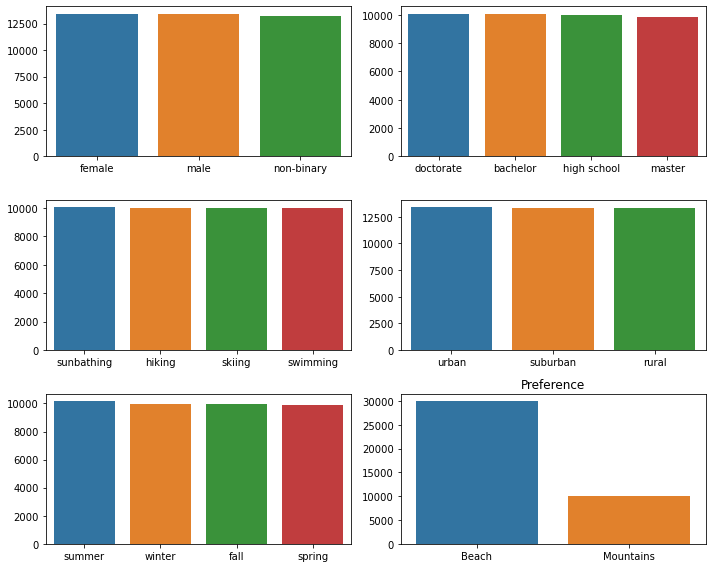

In [46]:
# Bar plot function
# That takes in dataset and a column(category variable) can be a list of column names
# Returns subplot with various categories
def plot_category(data,figsize=(10,8),n_row=None,n_col=None):
    """ 
    Input(data,figsize,n):
                           `data`= should be pd.DataFrame with only objects variables
                           `figsize` = a tupple default is (10,8)
                           `n_row(int)` = The number of rows for the subplots
                           `n_col(int)` = The number of col for the subplots

    Data should only contain categorical columns else it will be removed
    return: Plots of the categorical variables

    `Example:`👇🏿

    ```
    data = data.select_dtypes(include = 'object')
    figsize = (15,8)
    # Assuming the dataframe has 6 columns
    nrow= 2 # no of rows
    ncol= 3 # no of columns
    
    # Plot the categorical variables using Barplot
    plot_category(data,figsize=figsize,n_row=nrow,n_col=ncol)
    ```
    """
    if str(type(data))=="<class 'pandas.core.frame.DataFrame'>":
        data = data.select_dtypes(include ='object')
    else:
        return "🙏🏿 My Bad it is not a dataframe"
    
    fig,axes = plt.subplots(nrows=n_row,ncols=n_col,figsize=figsize)
    axes = axes.ravel() #Flatten the 2D array into 1D array for easier indexing
    
    for n,col in enumerate(data):
        val = data[col].value_counts().values
        ind = data[col].value_counts().index
        ax =axes[n]
        sns.barplot(y=val,x=ind,ax=ax)
        plt.title('{}'.format(col));

    # Remove any unused subplots
    for i in range(len(data.columns), len(axes)):
        fig.delaxes(axes[i])

    # Adjust the layout
    plt.tight_layout()
    

       

    
plot_category(cat_vac,n_col=2,n_row=3)

This data sounds a bit generic 🧐 It seem's too random yet uniformly distributed...Food for thought🎅🏿

### 2). Bivariate Analysis

#### Correlation Analysis
By understanding the various relationships that exist between our independent variables and Dependent variable we can seek to get insights about the type of relationship exisiting.

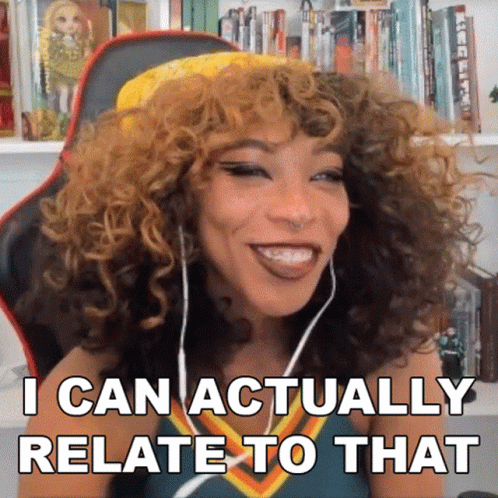

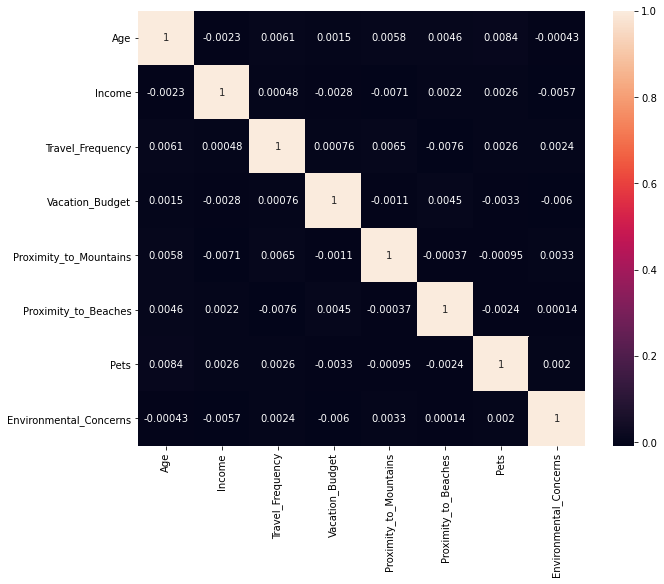

In [47]:
df_corr = vac_num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True);

**BUSTED!!??**

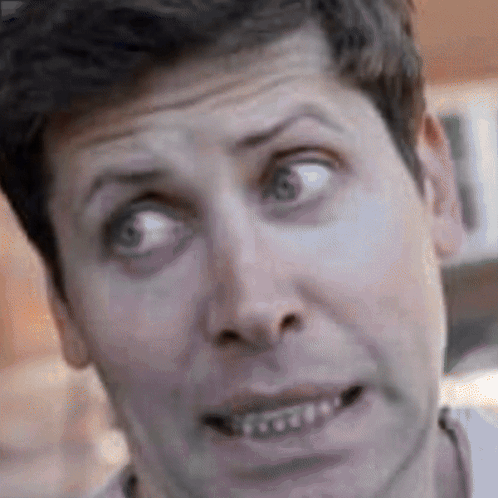 

`heat map`: Low correlation values between the data variables  would suggest that our model is not going to perform well on the data 

But taking into account correlation is not neccesarily causality 🤞🏿 staying optimistic

### AB Testing


## Modelling 🚀🤖

In this section we will work with two major classification models since our dependent variable has :
* `Deep Neural Network`: A simple network with atleast 2 Hidden layers
* `Logistic regression`:With the dependent variable as the preference for our classification model

We have to prerprocess the data to prepare it for machine learning:

1. Perform One-Hot encodng on the categorical variables
2. Split the data into Train and test split
3. Standardise the data or normalize 
4. For DNN we have to reshape our data  


In [105]:
# Import necessary modules
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,Normalizer
from sklearn.model_selection import train_test_split


#### 1. One-hot encoding


In [87]:
# Create a function that uses One Hot Encoding and creates labels using the rows

def OneShotEncoding(DF_data,drop=True):
    """ 
    This an update version of the One-Hot Encoder from
    sklearn but modified to take in more than one categorical 
    variable.

    NOTE:By default the drop first column is initiated which
    deletes the first level in a categorical variable

    """
    # Takes in Data
    categorical_data=DF_data.select_dtypes(include ="object")
    df_dummy_list = []
    # list_data = []
    for col in categorical_data:
        if drop:
            Enc_ohe, Enc_label = OneHotEncoder(drop='first'), LabelEncoder() # Create an instance of the class OneHot encoding
        else:
            Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
        Enc_label.fit_transform(DF_data[col])
        DF_dummies2 = pd.DataFrame(Enc_ohe.fit_transform(DF_data[[col]]).todense(), columns = Enc_label.classes_[1:])
        df_dummy_list.append(DF_dummies2)
    df_dummy_list.append(DF_data)
    result =pd.concat(df_dummy_list, axis=1)

    return(result)


#### 2). Split the data

In [97]:
Encoded_data= OneShotEncoding(Vacation)

X = Encoded_data.drop(columns='Preference').select_dtypes(include='number')
y= Encoded_data.Preference.map({'Mountains':0,'Beach':1})

# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# 

,male,non-binary,doctorate,high school,master,skiing,sunbathing,swimming,suburban,urban,...,winter,Mountains,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns
7516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,52,67271,2,2273,20,207,1,1
13705,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,54,75525,3,1091,81,284,0,1
39055,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,55,59008,5,4002,198,71,1,1
10031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,21,108502,8,2469,99,232,1,0
18671,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,67,49342,5,1395,149,172,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24674,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,58,25120,3,4517,261,161,0,0
11189,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,61,107199,1,3273,221,204,1,1
19550,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,28,104731,7,3959,17,172,0,0
26845,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,34,77426,1,3386,119,250,1,1


#### 4). Standardise and Normalizing the data

In [103]:
# For the Logistic model we will use the standardised data
Scaler =StandardScaler()

X_train_standardised=pd.DataFrame(Scaler.fit_transform(X_train),columns=X_train.columns)
X_test_standardised=pd.DataFrame(Scaler.fit_transform(X_test),columns=X_test.columns)

In [107]:
# For Neural network model we will use the normalised data
Norm = Normalizer()
X_train_norm =pd.DataFrame(Norm.fit_transform(X_train),columns=X_train.columns)
X_test_norm =pd.DataFrame(Norm.fit_transform(X_test),columns=X_test.columns)

In [108]:
X_train.shape

(31999, 22)

#### 5). Neural Network

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
# Create a model
# model = keras.models.Sequential([
#     keras.layers.Input(shape=()),
#     keras.layers.Dense(30)
# ])

#### 6). Logistic model